In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [3]:
df = pd.read_csv('/Users/mac/Desktop/Distribution of standardised income, 2022.csv')

df.head()

,standardised income (x 1000 euros),Households total,Single persion,Single person under AOW pension age,Single person above AOW entitlement age,Couple without children,Couple under AOW pension age without children,Couple above AOW entitlement age without children,Couple with children,Single-parent family,...,Three earners,Four or more earners,Wages,Profits,Pensions,Benefits,Private home owner,Tenant,Tenant without rent benefit,Tenant with rent benefit
0,less than -6,4,2,1,1,1,1,0,1,0,...,0,0,1,2,1,0,3,1,1,0
1,between -6 and -4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,between -4 and -2,2,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,0
3,between -2 and 0,21,19,19,0,2,2,0,0,0,...,0,0,7,2,0,12,1,21,20,1
4,between 0 and 2,38,33,32,1,3,3,0,1,1,...,0,0,23,4,2,10,2,36,30,6


In [4]:
df['Total'] = df.iloc[:,1:].sum(axis=1)
total_population = df['Total'].sum()
df['Percentage'] = df['Total']/total_population*100

In [13]:
print(total_population)

56914


In [20]:
df.head()

,standardised income (x 1000 euros),Households total,Single persion,Single person under AOW pension age,Single person above AOW entitlement age,Couple without children,Couple under AOW pension age without children,Couple above AOW entitlement age without children,Couple with children,Single-parent family,...,Wages,Profits,Pensions,Benefits,Private home owner,Tenant,Tenant without rent benefit,Tenant with rent benefit,Total,Percentage
0,less than -6,4,2,1,1,1,1,0,1,0,...,1,2,1,0,3,1,1,0,27,0.047440
1,between -6 and -4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0.005271
2,between -4 and -2,2,1,1,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,9,0.015813
3,between -2 and 0,21,19,19,0,2,2,0,0,0,...,7,2,0,12,1,21,20,1,169,0.296939
4,between 0 and 2,38,33,32,1,3,3,0,1,1,...,23,4,2,10,2,36,30,6,302,0.530625


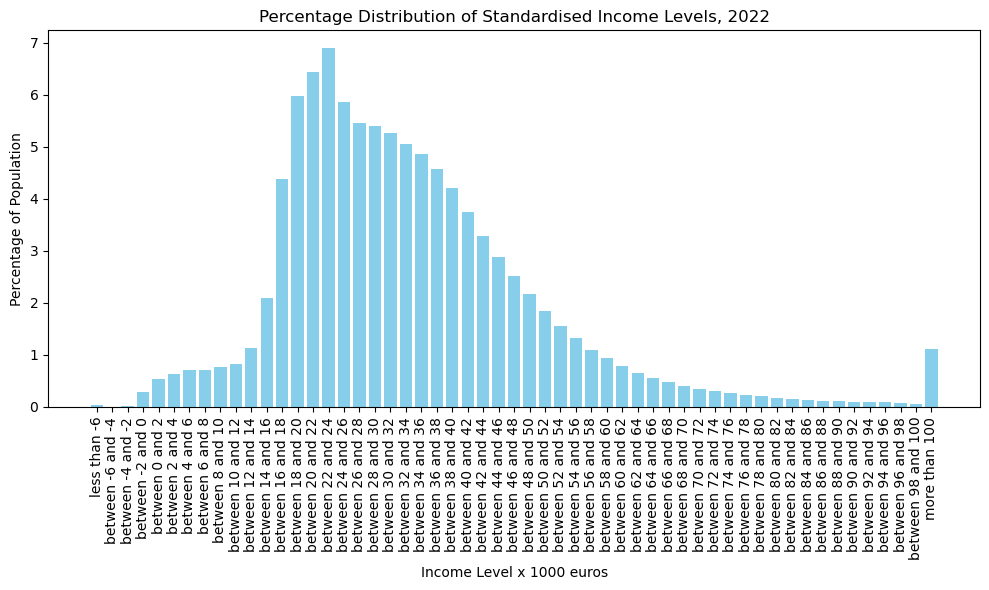

In [7]:
plt.figure(figsize=(10,6))
plt.bar(df.iloc[:, 0], df['Percentage'], color='skyblue')
plt.title('Percentage Distribution of Standardised Income Levels, 2022')
plt.xlabel('Income Level x 1000 euros')
plt.ylabel('Percentage of Population')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

Shape: 0.5692473281400429, Scale: 29.48480235857586


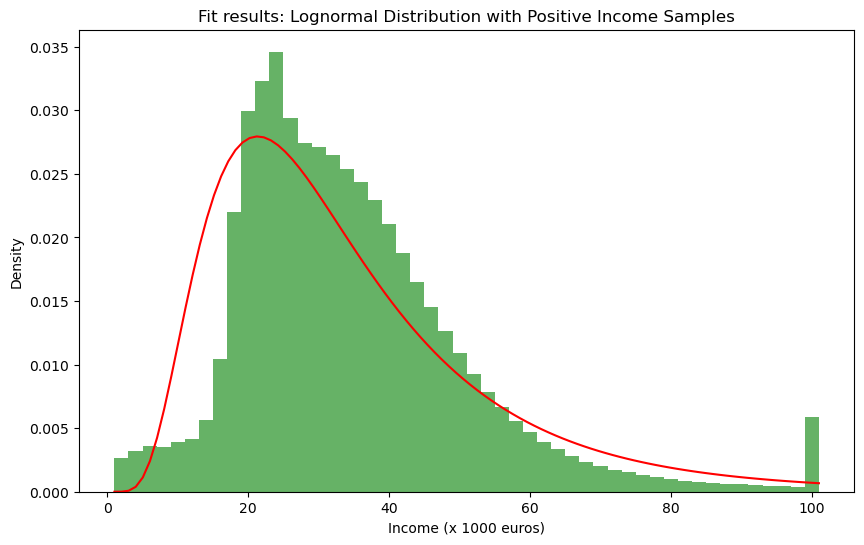

In [28]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Process income range data, calculate midpoints, and generate repeated samples
samples = []
for index, row in df.iterrows():
    income_range = row['standardised income (x 1000 euros)']
    percentage = row['Percentage']
    if 'between' in income_range:
        bounds = income_range.replace('between ', '').split(' and ')
        mid_point = (float(bounds[0]) + float(bounds[1])) / 2
    elif 'less than' in income_range:
        continue  # Skip ranges described as 'less than' some value
    elif 'more than' in income_range:
        bound = float(income_range.replace('more than ', ''))
        mid_point = bound + 1  # Assuming a default range for more than
    else:
        continue  # Skip if the format is not recognized
    if mid_point <= 0:
        continue  # Ignore income data that are less than or equal to zero
    # Repeat mid_point according to its proportion in the total population
    num_samples = int((percentage / 100) * total_population)
    samples.extend([mid_point] * num_samples)

# Convert the income data into a NumPy array
sample_data = np.array(samples)

# Fit a lognormal distribution to the data
shape, loc, scale = stats.lognorm.fit(sample_data, floc=0)  # Set location parameter to 0

# Print the fitted parameters
print(f"Shape σ: {shape}, Scale e^μ: {scale}")

# Plot the fitted curve
x = np.linspace(sample_data.min(), sample_data.max(), 100)
pdf_fitted = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)

plt.figure(figsize=(10, 6))
plt.hist(sample_data, bins=50, density=True, alpha=0.6, color='g')
plt.plot(x, pdf_fitted, 'r-')
plt.title('Fit results: Lognormal Distribution with Positive Income Samples')
plt.xlabel('Income (x 1000 euros)')
plt.ylabel('Density')
plt.show()
